In [316]:
df.drop(["Abertura", "Mínima", "Máxima", "Vol.", "Var%"], inplace=True, axis=1)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    250 non-null    datetime64[ns]
 1   Último  250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [318]:
df.index = pd.to_datetime(df.Data, format = "%d.%m.%Y")

In [319]:
df.drop("Data", inplace=True, axis=1)

In [320]:
df.head()

,Último
Data,
2023-07-31,121.943
2023-07-28,120.187
2023-07-27,119.990
2023-07-26,122.560
2023-07-25,122.008


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-07-31 to 2022-01-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Último  250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
sns.set_pallette("Accent")
sns.set_style("darkgrid")
ax = sns.lineplot(x="Data", y="Último", data=df)
ax.figure.set_size_inches(12, 6)
ax.set_title("blablabla", loc="left", fontsize=18)
ax.set_xlabel("blabla", fontsize=14)
ax.set_ylabel("blabla", fontsize=14)
ax = ax

In [ ]:
#calcular a diferença entre uma data e outra (data de baixo menos data de cima)
df["aumento"] = df["Último"].diff()

In [ ]:
sns.set_pallette("Accent")
sns.set_style("darkgrid")
ax = sns.lineplot(x="Data", y="aumento", data=df)
ax.figure.set_size_inches(12, 6)
ax.set_title("blablabla", loc="left", fontsize=18)
ax.set_xlabel("blabla", fontsize=14)
ax.set_ylabel("blabla", fontsize=14)
ax = ax

In [ ]:
#função pra plotar gráficos com essa msm config:

def plotar(título, labelx, labely, x, y, dataset):
  sns.set_pallette("Accent")
  sns.set_style("darkgrid")
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc="left", fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

In [ ]:
#aceleração da variacao entre os dados:
df["aceleracao"] = df["aumento"].diff()

In [ ]:
#função pra ver 3 gráficos em um só`. OBS: ESSE ME PARECE O GRÁFICO DE TENDÊNCIA E EXPURGO DA PÓS, ver
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

**Função de Autocorrelação.** Ela é uma medida de correlação entre as observações de uma série temporal. Para entender melhor o funcionamento dela, comparamos os valores com suas próprias correlações, ou seja, consigo mesmas. Cada passo dado pelo gráfico de correlação será chamado de Lag. Então, a cada passo que damos, estaremos verificando a correlação entre os valores da observação com eles mesmos.

No lag 1, faremos o que foi citado: compararemos os valores com eles mesmos, movimentando-os. Então, conforme passamos os Lags, executamos as comparações para encontrar o nível de correlação.

O nível máximo de correlação que encontraremos será 1. Isso significa que se a correlação for muito alta, o valor a ser encontrado dessa função será 1, e o mínimo, -1. Os valores serão sempre baseados nessa distribuição. O nível de correlação máxima será 1 e o nível de correlação mínima será -1.

Vamos criar esse gráfico de correlação para descobrir os valores das nossas vendas comparando com tempos anteriores.

Poderemos reparar nesse gráfico, então, que os 7 primeiros meses parecerão ter uma forte ligação com os meses passados porque a correlação estará alta nesse período. Com o passar do tempo ela será menor até a nulidade.

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(df['Último'])

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

Já temos nosso gráfico e entendemos pra que serve a função de autocorrelação. Agora, podemos calcular a correlação não só das vendas, como também do aumento e da aceleração. Copiaremos o código e faremos as devidas alterações.

In [ ]:
#plota gráfico da variação
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento')
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

In [ ]:
#plota gráfico da aceleração:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração')
autocorrelation_plot(alucar['aceleracao'])
ax=ax

A partir desses gráficos, podemos concluir que os 7 primeiros meses parecem ter uma ligação muito forte com os meses passados. Com o passar dos Lags essa correlação decrescerá.

A sazonalidade é um padrão repetitivo dentro de um determinado período fixo de tempo. Ou seja, sempre no mês 4 e no 6 a empresa venderá mais chocolate. Durante os demais meses, vende menos.

Esse comportamento é muito característico das séries temporais. Podemos vê-lo também no aumento. Há um aumento no mês 4 de acordo com o gráfico, e uma grande queda na sequência. Depois as vendas aumentam novamente no mês 6, e há queda de novo. Há uma relativa estabilidade até chegar novamente o mês de Abril do ano seguinte.

Até na aceleração do aumento das vendas é possível visualizar esse crescimento. isso significa que o padrão de sazonalidade é muito forte, pois se mantém em ambos os gráficos de aumento e aceleração.

**análise de sazonalidade por dia da semana**
O dia 1° foi uma segunda-feira, dia 2 terça. Podemos estipular uma nova coluna para tentar descobrir o que estará acontecendo com as vendas por meio de uma análise de acordo com dias da semana.

Para escrever o código que gera a coluna nova, pegaremos nosso DataFrame e a coluna do dia, e precisaremos saber qual será o dia da semana relacionado a esse dia do Data. Existe uma função para isso, a dt.

vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name(),

Para conferir, digitaremos:

vendas_por_dia.head()

Terá sido acrescentada essa coluna de dias da semana, relacionados aos 5 primeiros registros, pelo que poderemos observar. Podemos passar 7 dias para ter certeza de que foi uma semana vendas_por_dia.head(7).

Porém, os dados estarão todos em inglês (Monday, Tuesday, Wednesday, etc.). Vamos simplificar deixando-os em Português. Pegaremos todos os dados de dias da semana e usaremos o unique, que nos retornará todos os valores únicos quanto aos dias da semana.

vendas_por_dia['dia_da_semana'].unique()COPIAR CÓDIGO
Será devolvido: array (['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], dtype=object) .

Então, criaremos um dicionário próprio com esses valores. Geraremos uma variável chamada dias_traduzidos. Daremos "Ctrl C + Ctrl V" para copiar os dias em Inglês, e colocaremos dois pontos (:) para passaras traduções.

dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

Agora, precisaremos mapear esses dias da semana pelos dias da semana traduzidos. Na sequência já visualizaremos por 2 semanas se a alteração foi efetuada corretamente, passando 14 dias para o head.

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)COPIAR CÓDIGO
Podemos observar que nos sábados e domingos e no feriado do dia 12 de Outubro as vendas foram bem menores do que em comparação com os dias da semana. Isso pode significar que a empresa durante esses dias não abra durante todo o horário comercial, ou não disponibilize todos os seus vendedores, porque há vendas, mas elas são diminutas.

Para conseguir afirmar categoricamente se as vendas sempre são menores aos finais-de-semana, vamos agrupar e obter médias dos valores de cada dia da semana. Faremos isso não só para as médias das vendas, como também para o aumento e a aceleração.

Criaremos uma célula de tipo texto clicando no botão "Text", escreveremos uma hashtag (#) e o título "Agrupando os dias". Agruparemos os dias da semana e calcularemos as médias. Antes, criaremos uma variável, vendas_agrupadas. groupbyservirá para agrupar e mean para a média. O roundserá responsável por arredondar os números obtidos.

vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

Executaremos esse código No Domingo, a média das vendas será 19.0 e do aumento, 3.0. No sábado, a média das vendas será 16 e a do aumento -28.0. Então sábado de fato será o dia mais fraco para as vendas. Nos demais dias, exceto por Sexta (45.0), Sábado e Domingo, a média das vendas será sempre maior do que 50.

Então,podemos concluir analisando a sazonalidade que as quedas representadas no gráfico serão referentes aos finais-de-semana. Por alguma regra dos negócios da empresa, esses dias, contando com feriados, contaram bastante para a tendência que nosso gráfico apresentará.



A **normalização** é uma prática comum do trabalho com Time Series. Geralmente, a quantidade de dias úteis do mês, de dias da semana ou até dias úteis são técnicas utilizadas para normalizar séries temporais.

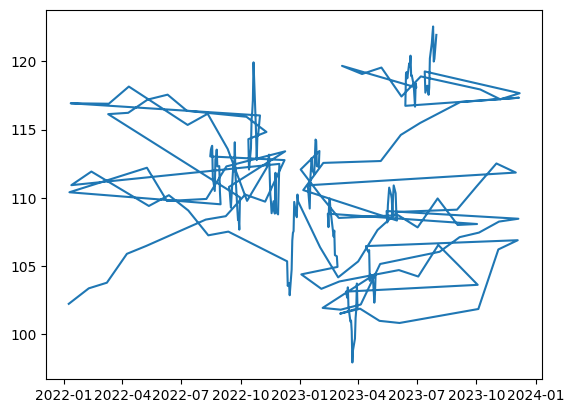

In [322]:
plt.plot(df.index, df.Último)

In [325]:
#decompor a série nos seus componentes - tendência, sazonalidade, resíduo
resultados = seasonal_decompose(df, period=12)
#outra forma de plotar os gráficos
ax = resultados.plot()

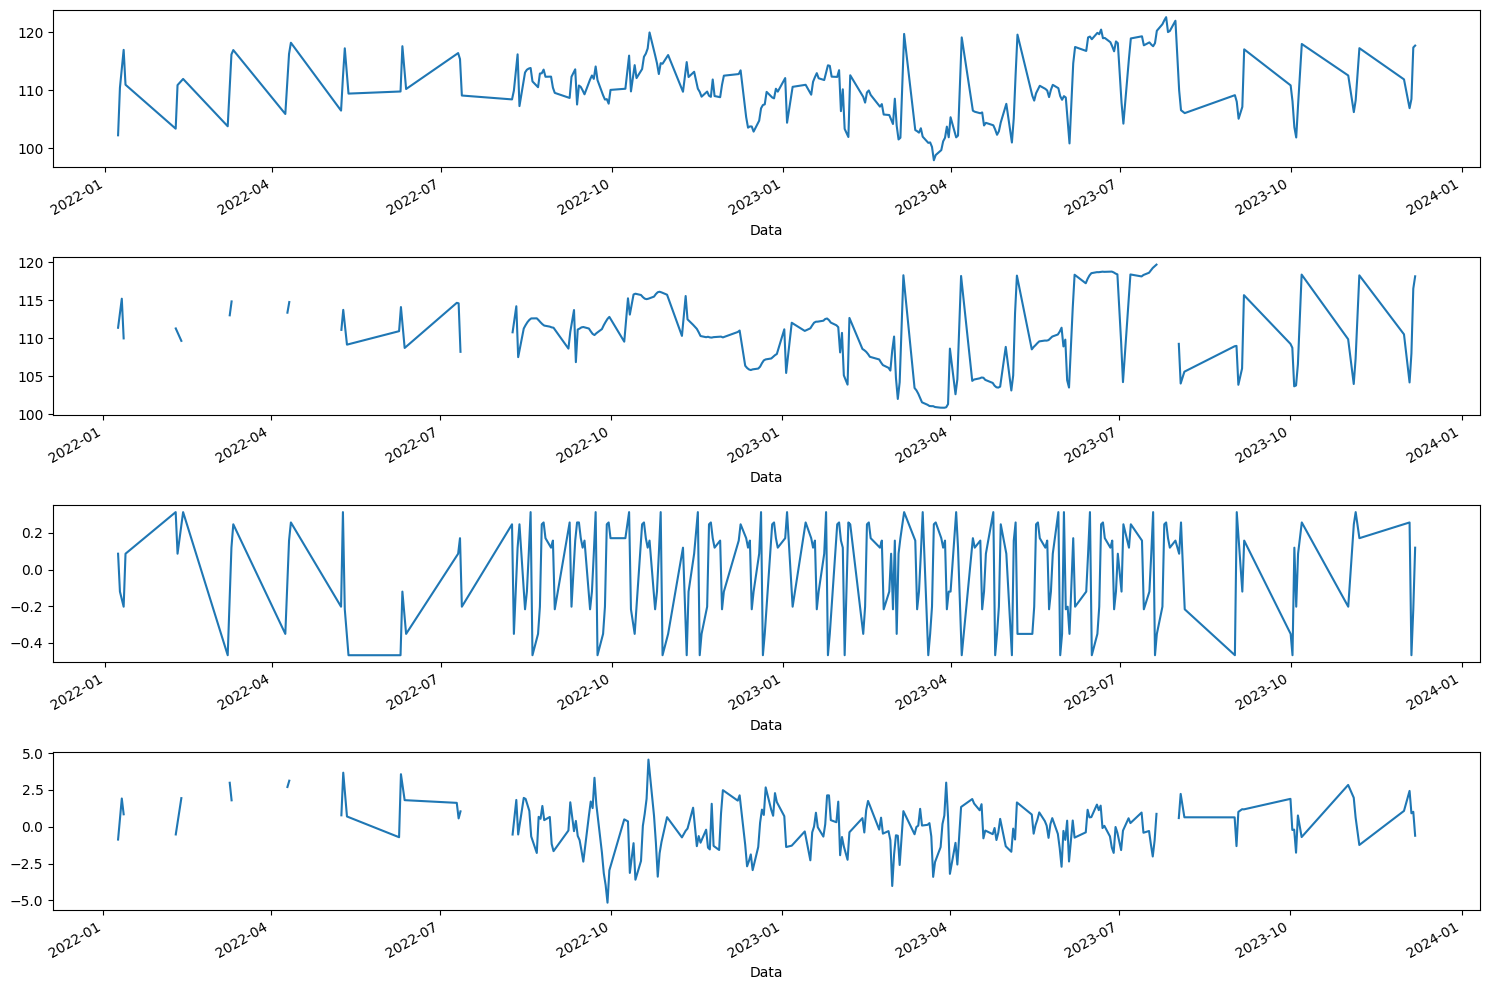

In [326]:
#tentar plotar os gráficos da forma do código acima
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

Existe uma técnica muito conhecida e utilizada para a redução desses ruídos, a Média Móvel. A ideia é tentar minimizar os ruídos de uma série temporal através de médias móveis, pegando dois ou mais pontos e calculando uma média de 7 dias entre eles. Depois, é calculada a média de mais 7 dias, e os pontos serão marcados para minizar a dispersão da frequência.
Já há uma função no Pandas para o cálculo, a rolling. Especificaremos no nosso código que queremos a média para 7 dias, e na sequência, também colocaremos mean (média):

alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

Vamos rodar esse código e visualizaremos uma coluna com valores vazios para os primeiros 6 dias e a média calculada para o 7° dia. Agora plotaremos o gráfico para poder visualizar e comparar com o gráfico das vendas sem a média móvel.

Usaremos a função plotar que criamos.

plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

Executaremos, e teremos um gráfico bem diferente do primeiro. Já não teremos tantos ruídos na nossa série.

**Transformada logarítmica:** Supondo que a distribuição da variável em questão possui um viés, ou seja, uma das extremidades elevadas e uma cauda longa, medidas como correlação ou regressão podem ser bastante influenciadas pelo pico da distribuição, outliers, dentre outros. A aplicação da transformação pode reduzir o efeito do viés.
O que vou fazer? Vou aplicar o logaritmo exatamente nos óbitos que é só a informação que precisamos. Não precisamos fazer isso na data por motivos óbvios. Não vamos entender nada se aplicarmos o logaritmo na data. É o que chamamos de gráfico monolog. Então aplicamos o logaritmo só em um dos eixos. Normalmente na variável que estamos tentando visualizar, que é o eixo "y".
Vou criar mais uma figura, plt.figure. Vou fazer aquela mesma coisa, figsize=(20,8), vou criar um objeto "fig" e vou lá, fig = sns.lineplot(x= ‘data’ ,y=’Obitos’ ,data=df_sp)
Vamos definir o título, fig.set_title( ‘Óbitos em função do tempo no estado de SP). Vamos colocar fig.set_xlabel(‘Data’) e colocar fig.ylabel(‘Log Óbitos’). Também esqueci de colocar a localização. Então o título vai ficar à esquerda loc= ‘left’ ,fontsize=14
Então como eu faço? Fig.set_yscale(‘log’).

**Correlação:**
Em estatística, correlação não é uma definição única, existem várias. Mas normalmente quando estamos trabalhando com senso de dados, estamos falando da correlação "Pearson" que basicamente mede a dependência linear entre duas variáveis.

[00:22] Então se olharmos, por exemplo, o nosso gráfico da esquerda onde temos uma correlação positiva perfeita. Temos ali duas variáveis, "x" e "y". E o que acontece? Na medida que eu aumento a variável "x", eu também aumento a variável "y" e por isso que eu tenho uma correlação positiva. E ela é perfeita porque todos os meus pontos laranjas estão em cima dessa reta linear.

[00:51] Então temos uma correlação perfeita como se eu pudesse definir todos os pontos por meio da regressão linear. No caso do gráfico à direita temos uma correlação positiva forte, mas não perfeita. Porque apesar dos pontos estarem próximos dessa reta, eles não estão todos exatamente em cima dela.

[01:15] Por outro lado, agora neste novo gráfico da esquerda não temos correlação. Então a variável "x" e a variável "y" não estão correlacionadas. Por quê? Porque não conseguimos achar uma tendência para esses dados, para esses pontos laranjas. É como se eles não tivessem nenhuma relação de fato. Então uma variável não é linearmente dependente da outra.

[01:40] No caso do novo gráfico à direita vamos ter uma correlação negativa forte. Por quê? Porque agora na medida que eu aumento o valor no eixo "x", eu diminuo o valor no eixo "y". Então a reta tem essa inclinação diagonal. E no caso da positiva ela tinha essa inclinação. Novamente, ela não é uma correlação perfeita porque alguns dos pontos não estão em cima da reta, eles só têm uma tendência a seguir esse comportamento.

Quando estamos trabalhando com a mesma série temporal nós falamos de **autocorrelação**. E o que vamos medir é a correlação entre os períodos.

[03:31] Então se temos, por exemplo, a métrica de tempo sendo o mês, vou estar basicamente dando uma olhada no mês, por exemplo, de agosto e no mês de julho, depois do mês de junho e aí faço esse comparativo. **E o nome que damos ao período com essa correlação é lag**.

**Feature engineering:** criar um dataframe com novos dados referentes ao df original, criar novas features

In [324]:
#pra filtrar um df e criar novo baseado em somente uma variável:
#df_sp = [df["estado"] == "SP"]